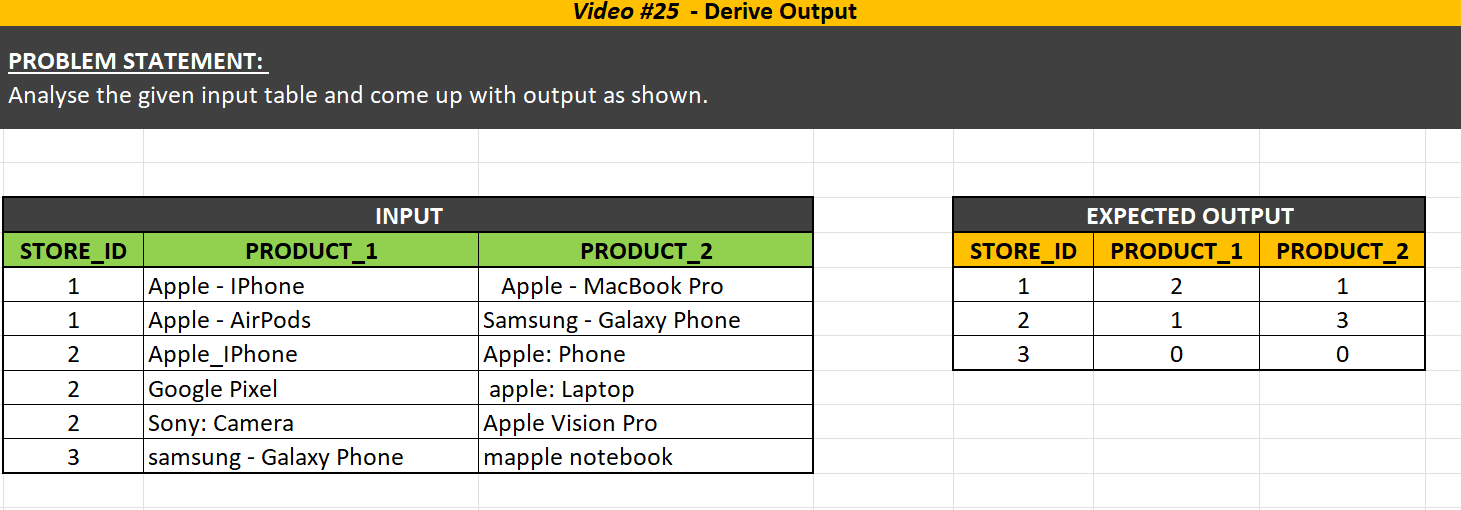

In [23]:
# Create a list of dictionaries based on the provided data
data = [
    {"STORE_ID": 1, "PRODUCT_1": "Apple - IPhone", "PRODUCT_2": "Apple - MacBook Pro"},
    {"STORE_ID": 1, "PRODUCT_1": "Apple - AirPods", "PRODUCT_2": "Samsung - Galaxy Phone"},
    {"STORE_ID": 2, "PRODUCT_1": "Apple_IPhone", "PRODUCT_2": "Apple: Phone"},
    {"STORE_ID": 2, "PRODUCT_1": "Google Pixel", "PRODUCT_2": "apple: Laptop"},
    {"STORE_ID": 2, "PRODUCT_1": "Sony: Camera", "PRODUCT_2": "Apple Vision Pro"},
    {"STORE_ID": 3, "PRODUCT_1": "samsung - Galaxy Phone", "PRODUCT_2": "mapple notebook"}
]
import pandas as pd

# Convert the list to a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


   STORE_ID               PRODUCT_1               PRODUCT_2
0         1          Apple - IPhone     Apple - MacBook Pro
1         1         Apple - AirPods  Samsung - Galaxy Phone
2         2            Apple_IPhone            Apple: Phone
3         2            Google Pixel           apple: Laptop
4         2            Sony: Camera        Apple Vision Pro
5         3  samsung - Galaxy Phone         mapple notebook


In [24]:
import re
df["PRODUCT_1"]=df["PRODUCT_1"].apply(lambda x: re.split(r'[ _:-]', x)[0].lower())
df["PRODUCT_2"]=df["PRODUCT_2"].apply(lambda x: re.split(r'[ _:-]', x)[0].lower())
df

,STORE_ID,PRODUCT_1,PRODUCT_2
0,1,apple,apple
1,1,apple,samsung
2,2,apple,apple
3,2,google,apple
4,2,sony,apple
5,3,samsung,mapple


In [25]:
df.groupby(["STORE_ID"]).agg(
    PRODUCT_1 = ('PRODUCT_1', lambda x :  (x=="apple").sum()),
    PRODUCT_2 = ('PRODUCT_2', lambda x : (x=="apple").sum())
).reset_index()

,STORE_ID,PRODUCT_1,PRODUCT_2
0,1,2,1
1,2,1,3
2,3,0,0
